In [2]:
import glob
img_list = glob.glob('Datasets/102flowers/jpg/*.jpg')

In [3]:
print(img_list)
print(type(img_list))
print(type(img_list[0]))
print('direcory has', len(img_list),'images')

['Datasets/102flowers/jpg/image_04402.jpg', 'Datasets/102flowers/jpg/image_07937.jpg', 'Datasets/102flowers/jpg/image_00839.jpg', 'Datasets/102flowers/jpg/image_03997.jpg', 'Datasets/102flowers/jpg/image_08012.jpg', 'Datasets/102flowers/jpg/image_07497.jpg', 'Datasets/102flowers/jpg/image_02567.jpg', 'Datasets/102flowers/jpg/image_03310.jpg', 'Datasets/102flowers/jpg/image_02851.jpg', 'Datasets/102flowers/jpg/image_03333.jpg', 'Datasets/102flowers/jpg/image_06162.jpg', 'Datasets/102flowers/jpg/image_00198.jpg', 'Datasets/102flowers/jpg/image_04145.jpg', 'Datasets/102flowers/jpg/image_01978.jpg', 'Datasets/102flowers/jpg/image_02305.jpg', 'Datasets/102flowers/jpg/image_02169.jpg', 'Datasets/102flowers/jpg/image_06835.jpg', 'Datasets/102flowers/jpg/image_00446.jpg', 'Datasets/102flowers/jpg/image_00611.jpg', 'Datasets/102flowers/jpg/image_02121.jpg', 'Datasets/102flowers/jpg/image_05144.jpg', 'Datasets/102flowers/jpg/image_00863.jpg', 'Datasets/102flowers/jpg/image_00715.jpg', 'Datasets/

In [4]:
# To import the image data
#%pip install opencv-python
import cv2 # Imports the OpenCV library, a powerful tool for image processing and computer vision tasks.
for img_name in img_list:
    img = cv2.imread(img_name)
    print(img.shape)

(500, 711, 3)
(504, 501, 3)
(500, 750, 3)
(590, 500, 3)
(500, 764, 3)
(501, 667, 3)
(500, 580, 3)
(500, 666, 3)
(500, 752, 3)
(667, 500, 3)
(500, 664, 3)
(501, 755, 3)
(500, 666, 3)
(500, 502, 3)
(701, 500, 3)
(500, 667, 3)
(500, 500, 3)
(501, 667, 3)
(500, 667, 3)
(500, 667, 3)
(591, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 624, 3)
(663, 500, 3)
(500, 752, 3)
(500, 752, 3)
(500, 540, 3)
(500, 653, 3)
(667, 500, 3)
(500, 667, 3)
(500, 687, 3)
(500, 667, 3)
(500, 752, 3)
(500, 722, 3)
(501, 762, 3)
(500, 594, 3)
(667, 500, 3)
(500, 750, 3)
(500, 666, 3)
(500, 652, 3)
(752, 500, 3)
(500, 669, 3)
(665, 500, 3)
(500, 667, 3)
(500, 752, 3)
(500, 667, 3)
(566, 500, 3)
(636, 500, 3)
(667, 500, 3)
(500, 532, 3)
(500, 557, 3)
(500, 612, 3)
(500, 683, 3)
(500, 721, 3)
(500, 768, 3)
(500, 589, 3)
(500, 754, 3)
(745, 500, 3)
(500, 680, 3)
(500, 525, 3)
(667, 500, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(684, 500, 3)
(571, 500, 3)
(500, 709, 3)
(500, 667, 3)
(500, 596, 3)
(500, 752, 3)
(500, 

### Resising and reshaping images
1. We need our set of features to be equal in size for every data point.

2. Resize images using OpenCV

### Reshaping pixel data to feature data

3. Need to reshape our image data into a features matrix (a 2D table)

In [7]:
# Import libraries and set parameters (define dimensions)
import numpy as np
nrow = 128
ncol = 128

# Initialize Feature Matrix
n_features = nrow * ncol
n_samples = len(img_list)
X = np.zeros((n_samples, n_features))
#print(X)


for i, img_name in enumerate(img_list):
    img = cv2.imread(img_name, 0) # Read image in grayscale
    
    # resize/reshape
    img_resized = cv2.resize(img, (nrow, ncol))
    
    # flatten into array
    img_flat = img_resized.flatten()
    
    X[i,:] = img_flat
    
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Part 2: Feature Extraction Using HOG


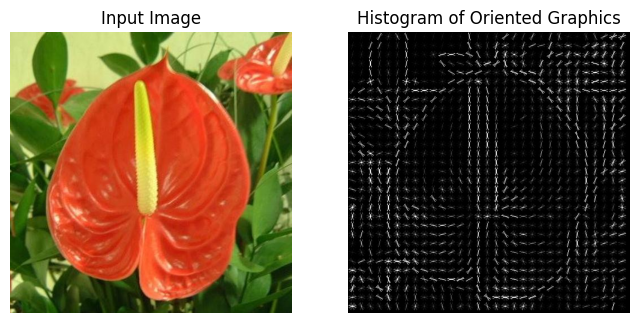

In [8]:
import cv2 # Image Processing
from skimage.feature import hog # Compute Histogram of Graphics
from skimage import exposure # Image Rescaling
import matplotlib.pyplot as plt # Plotting Images and Graphs


# Read and Convert image from BGR to RGB using OpenCV (for Matplotlib)
image = cv2.imread(img_list[13])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Compute HOG Features
fd, hog_image = hog(image, orientations = 8,
                    pixels_per_cell = (16, 16),
                    cells_per_block = (1, 1),
                    visualize = True, channel_axis = -1)

# Normalise HOG representation
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('Input Image')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Graphics')
plt.show()

In [9]:
print('original image has shape', image.shape, 'and so', image.shape[0]*image.shape[1], 'pixels')

original image has shape (500, 502, 3) and so 251000 pixels


In [10]:
print('hog representation instead has', fd.shape, 'features')

hog representation instead has (7688,) features


### Building an Image Classifier
1. 

No. of images = 1360
(1360, 49152)
0.25882352941176473


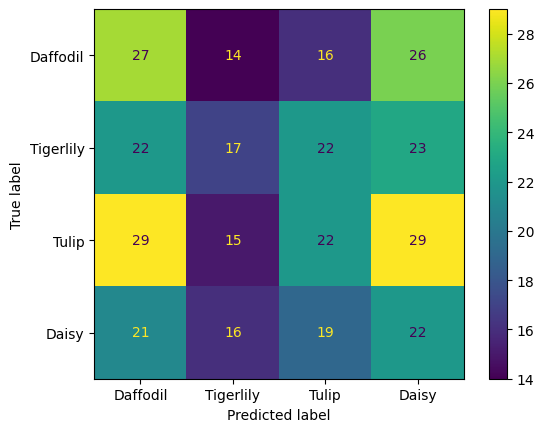

In [12]:
# Making the features matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import glob
import cv2
import numpy as np

# Get a list of files having the ".jpg" extension from the dataset folder
img_list = glob.glob('Datasets/17flowers/jpg/*.jpg')

# Set number of rows and colums to 128
nrow = 128
ncol = 128

# Calculate the number of features (rows x colums x 3 colour channels)
n_features = nrow * ncol * 3

# Get the number of samples (how many images?)
n_samples = len(img_list)
print(f"No. of images = {n_samples}")

# Create a matrix of zeros with n_samples number of rows, and n_features numbers of columns
X = np.zeros((n_samples, n_features))
# print(f"The matrix of zeros f{X}")
print(X.shape)

# loop through the list of files
for i, img_name in enumerate(img_list):
    # open the image using cv2 (OpenCV)
    img = cv2.imread(img_name)
    
    # resizze the image to be nrow by ncol pixels
    img_resized = cv2.resize(img, (nrow, ncol))
    
    # Flatten the image data into a 1D array
    img_flat = img_resized.flatten()
    
    # add the flattened data to the ith row of the matrix X
    X[i,:] = img_flat

# Creating the Target Vector
species_list = ['Daffodil', 'Tigerlily', 'Tulip', 'Daisy']
y = []
for species in species_list:
    y += [species] * 340
    
# Step 2: Naive Bayes Classifier - Pixel Data

# Spit the Dataset into Training and Test Datasets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

# Initialise the classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Train the model
model.fit(Xtrain, ytrain)

# Evaluate the model
ymodel = model.predict(Xtest)

score = accuracy_score(ytest, ymodel)
print(score)

# Create and Display the Confusion matrix
mat = confusion_matrix(ytest, ymodel)
disp = ConfusionMatrixDisplay(
    confusion_matrix=mat, display_labels=species_list)
disp.plot()
plt.show()

Number of HOG features should be 1024
(1360, 1024)
0.25


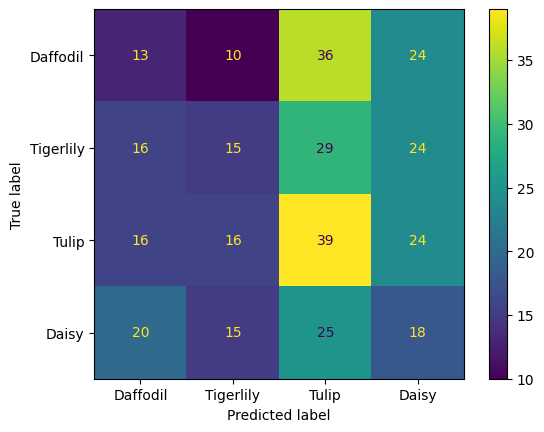

In [15]:
# Naive Bayes Classifier - HOG features

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

pix_per_cell = 16
orients = 16

# Get a list of files having the ".jpg" extension from the dataset folder
img_list = glob.glob('Datasets/17flowers/jpg/*.jpg')

# Get the number of images in the dataset
n_samples = len(img_list)


# Calculate the number of features, returned as a integer
n_features = int((nrow/pix_per_cell) * (ncol/pix_per_cell) * orients)
print(f"Number of HOG features should be {n_features}")

from skimage.feature import hog
# Create an empty features matrix
X = np.zeros((n_samples, n_features))
print(X.shape)

# Loop through the list of files
for i, im_name in enumerate(img_list):
    # Open Image
    img = cv2.imread(im_name)
    
    # resize the image
    img_resized = cv2.resize(img, (nrow, ncol))
    
    # Obtain the HOG features
    img_hog = hog(img_resized, orientations = orients, pixels_per_cell = (pix_per_cell, pix_per_cell), cells_per_block = (1, 1), visualize = False, channel_axis = -1)
    
    # Add the data to the ith row of matrix X
    X[i,:] = img_hog
    
# Creating the Target Vector
species_list = ['Daffodil', 'Tigerlily', 'Tulip', 'Daisy']
y = []
for species in species_list:
    y += [species] * 340

# Split the dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=7)

# Initialise the classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Train the model
model.fit(Xtrain, ytrain)

# Evaluate the model
ymodel = model.predict(Xtest)

from sklearn.metrics import accuracy_score
score = accuracy_score(ytest, ymodel)
print(score)

# Create and Display the Confusion matrix

mat = confusion_matrix(ytest, ymodel)
disp = ConfusionMatrixDisplay(
    confusion_matrix=mat, display_labels=species_list)
disp.plot()
plt.show()

0.23529411764705882


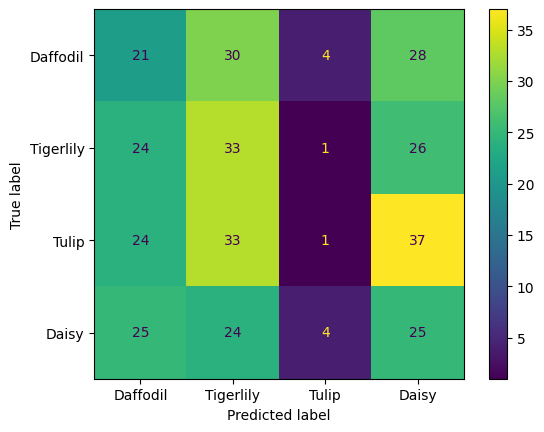

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import glob
import cv2
import numpy as np


img_list = glob.glob('FlowerData/*.jpg')


nrow = 128
ncol = 128


n_features = nrow * ncol * 3


n_samples = len(img_list)
X = np.zeros((n_samples, n_features))


for i, im_name in enumerate(img_list):
    img = cv2.imread(im_name)

    img_resized = cv2.resize(img, (nrow, ncol))

    img_flat = img_resized.flatten()

    X[i, :] = img_flat
    
    
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()

model.fit(Xtrain, ytrain)

ymodel = model.predict(Xtest)

score = accuracy_score(ytest, ymodel)
print(score)


mat = confusion_matrix(ytest, ymodel)

disp = ConfusionMatrixDisplay(confusion_matrix=mat, display_labels=species_list)
disp.plot()

plt.show()